# Logistic Regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
titanic_data=pd.read_csv('titanic_train[1].csv')

In [3]:
#Checking rows & columns

titanic_data.shape

(891, 12)

In [4]:
#Checking top data

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking the null values

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualizing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

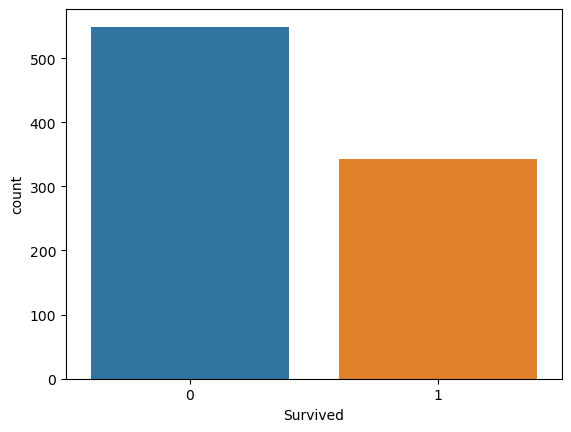

In [7]:
sns.countplot(x='Survived', data = titanic_data)  #Here  0  means not survied & 1 means survied

<AxesSubplot:xlabel='Survived', ylabel='count'>

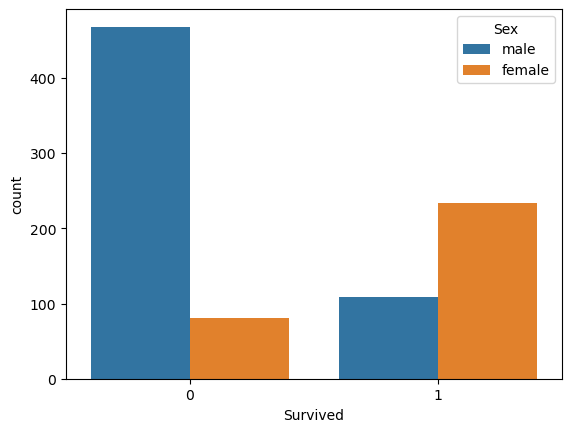

In [8]:
# Checking Male to Female ratio who survived
sns.countplot(x='Survived', data=titanic_data, hue = 'Sex')

<AxesSubplot:>

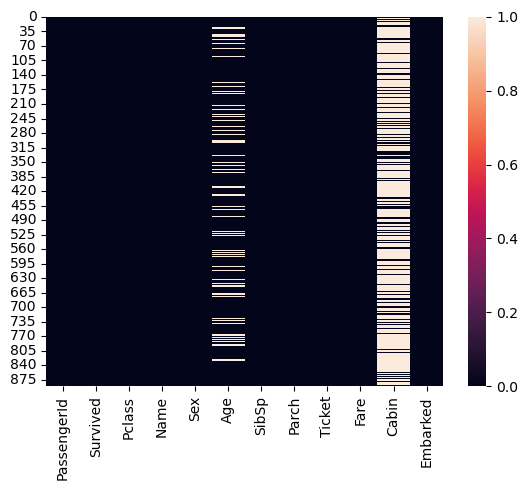

In [9]:
#Visualizing null values

sns.heatmap(titanic_data.isna())  #From here it is visualize that cabin columns has tremendous number of null values

In [10]:
#Checking null values in % for better understanding

(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [11]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

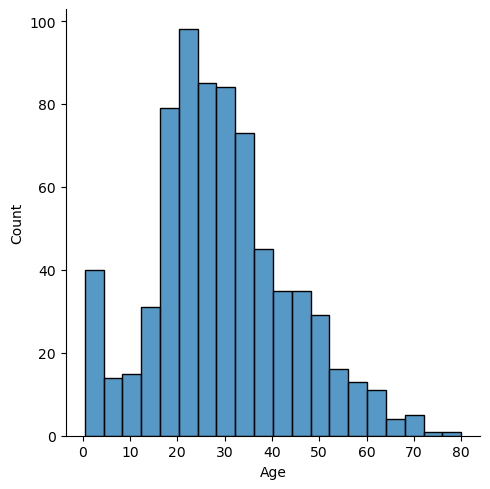

In [12]:
sns.displot(x='Age', data = titanic_data)

# Cleaning Data

In [13]:
# Filling age column

titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [14]:
#Validating null value again

titanic_data['Age'].isna().sum()

0

In [15]:
#Dropping Cabin column as it has tremendous number of null data which is not good for modelling
titanic_data.drop('Cabin',axis=1,inplace=True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#Importing library

from sklearn.preprocessing import LabelEncoder

In [23]:
encoder= LabelEncoder()
for col in titanic_data.columns:
    if titanic_data['Sex'].dtypes =='object':
        titanic_data['Sex'] = encoder.fit_transform(titanic_data['Sex'], inplace=True)

In [24]:
#Cross Checking

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [25]:
#Dropping unwanted columns

titanic_data.drop(['Name','Ticket','Embarked'],axis=1, inplace=True)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [27]:
x=titanic_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
y=titanic_data[['Survived']]

In [28]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.000000,1,0,7.2500
1,2,1,0,38.000000,1,0,71.2833
2,3,3,0,26.000000,0,0,7.9250
3,4,1,0,35.000000,1,0,53.1000
4,5,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000
887,888,1,0,19.000000,0,0,30.0000
888,889,3,0,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [29]:
#importing train test split

from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
x_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
709,710,3,1,29.699118,1,1,15.2458
439,440,2,1,31.000000,0,0,10.5000
840,841,3,1,20.000000,0,0,7.9250
720,721,2,0,6.000000,0,1,33.0000
39,40,3,0,14.000000,1,0,11.2417
...,...,...,...,...,...,...,...
821,822,3,1,27.000000,0,0,8.6625
633,634,1,1,29.699118,0,0,0.0000
456,457,1,1,65.000000,0,0,26.5500
500,501,3,1,17.000000,0,0,8.6625


In [52]:
#importing logistic regression

from sklearn.linear_model import LogisticRegression

In [53]:
#Storing Logistic regression in variable

lr=LogisticRegression()

In [54]:
#Fitting

lr.fit(x_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
#PREDICTING

y_pred = lr.predict(x_test)

In [56]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix=(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.76      0.69      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



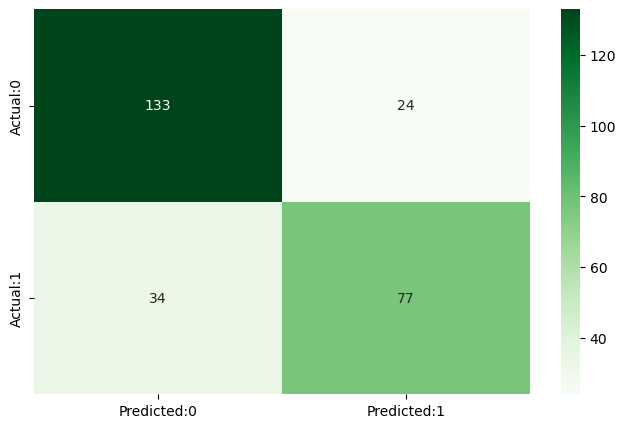

In [58]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Greens')
plt.show

print(classification_report(y_test, y_pred))